Logistic Regression on Building_01 Data from T_315500_234500_NW.bin

Not Completed Yet
 
For Reference: https://elitedatascience.com/imbalanced-classes

In [ ]:
# Import Important Libraries
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing, linear_model # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_recall_fscore_support # 
import numpy as np
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt


In [ ]:
#Reading CSV File, Building_01, which is actually building_0000 
df = pd.read_csv('building_01.csv', names = ['X','Y','Z','R','G','B','Point_Source_ID','Scan_Angle_Rank','Flightline_Edge','Scan_Direction','Number_of_Returns','Return_Number','Time','Intensity','Classification'])
#df1 = df.dropna() 
#df2 = df1.values

#print(df2[:, 14])
from sklearn.utils import resample 
df_majority = df[df.Classification == 2]
df_minority = df[df.Classification == 4] 

#print(df_majority)
#downsampling majority class 

df_majority_downsampled = resample(df_majority, replace = False, n_samples = 235519, random_state=123)
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

#display class counts 
df_downsampled.Classification.value_counts()


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2    235519
4    235519
Name: Classification, dtype: int64

In [ ]:
#Reading CSV File #2, Building_0000001 txt 
df_a = pd.read_csv('Buildings_000001.txt',sep = ' ')
df_a1 = df_a.dropna() 
df_a2 = df_a1.values

In [ ]:
#Reading CSV File #2, Building_0000002 txt 
df_b = pd.read_csv('Buildings_000002.txt',sep = ' ')
df_b1 = df_a.dropna() 
df_b2 = df_a1.values

In [ ]:
#Checking to see if everything is working 
#df.info()
#df.head(3)
classifier_count = df['Classification'].value_counts().to_frame()
classifier_count.head(2)

df_a.info()
#df_a.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73046 entries, 0 to 73045
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   //X                73046 non-null  float64
 1   Y                  73046 non-null  float64
 2   Z                  73046 non-null  float64
 3   R                  73046 non-null  int64  
 4   G                  73046 non-null  int64  
 5   B                  73046 non-null  int64  
 6   Point_Source_ID    73046 non-null  float64
 7   Scan_Angle_Rank    73046 non-null  float64
 8   Flightline_Edge    73046 non-null  float64
 9   Scan_Direction     73046 non-null  float64
 10  Number_of_Returns  73046 non-null  float64
 11  Return_Number      73046 non-null  float64
 12  Time               73046 non-null  float64
 13  Intensity          73046 non-null  float64
 14  Classification     73046 non-null  float64
dtypes: float64(12), int64(3)
memory usage: 8.4 MB


In [ ]:
#without upsampling
#I will use all the attributes (building_000000 CSV)
#x = df2[:, :14] 
#y = df2[:, 14]

#with upsampling 
x = df_downsampled.drop('Classification', axis = 1)
print(x)
y = df_downsampled.Classification
print(y)
print(x.shape,y.shape)

                   X            Y          Z    R  G    B Point_Source_ID  \
649483    315694.385  234827.7002      28.15  170  0  255              21   
715057    315691.595  234833.8882      4.768  170  0  255              22   
375611    315712.785  234854.0371  27.684999  170  0  255              13   
351709    315690.428   234844.312     28.118  170  0  255              13   
117837      315732.0   234834.874     28.021  170  0  255              21   
...              ...          ...        ...  ... ..  ...             ...   
1048565  315752.2111  234840.3428      30.35  170  0  255              12   
1048566   315751.166  234839.3848      30.34  170  0  255              12   
1048567   315751.252    234839.48     30.358  170  0  255              12   
1048568   315751.344  234839.5801     30.343  170  0  255              12   
1048569   315751.436  234839.6812  30.356001  170  0  255              12   

        Scan_Angle_Rank Flightline_Edge Scan_Direction Number_of_Returns  \

In [ ]:
#For building 000001
x1 = df_a2[:, :14] 
y1 = df_a2[:, 14] 

In [ ]:
#For building 000002
x2 = df_b2[:, :14] 
y2 = df_b2[:, 14] 

In [ ]:
#Train/Test Split
x_scaled = preprocessing.scale(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, train_size = 0.75)

#Making sure that 
y_train=y_train.astype('int')
y_test = y_test.astype('int')
print(x_train.shape, x_test.shape)
print(y_train)

(353278, 14) (117760, 14)
710843    2
683724    2
96612     2
86562     4
88305     4
         ..
339135    4
151327    2
700219    4
251678    2
412059    4
Name: Classification, Length: 353278, dtype: int64


In [ ]:
#Logistic Regression 
logreg = LogisticRegression(C=1000).fit(x_train,y_train)
yhat_train = logreg.predict(x_train)
print(np.unique(yhat_train))
accuracy_train = accuracy_score(y_train, yhat_train)
print("Accuracy for Train Data:",accuracy_train)

yhat_test = logreg.predict(x_test)
accuracy_test = accuracy_score(y_test, yhat_test)
print("Accuracy for Test Data:",accuracy_test)


[2 4]
Accuracy for Train Data: 0.7699517094186448
Accuracy for Test Data: 0.7724864130434783


In [ ]:
'''
#Logistic Regression 
logreg = linear_model.LogisticRegression(C=10**8) #using a large c value = no regularization
logreg.fit(x_train, y_train)
yhat_train = logreg.predict(x_train)
#print(yhat_train)

#finding accuracy of applying model on training data
accuracy_train = accuracy_score(y_train, yhat_train)
print("Accuracy on train set:",accuracy_train)

#finding accuracy of applying model on test data 
yhat_test = logreg.predict(x_test)
#print(yhat_test)
accuracy_test = accuracy_score(y_test, yhat_test)
print("Accuracy on test set:",accuracy_test)
'''

'\n#Logistic Regression \nlogreg = linear_model.LogisticRegression(C=10**8) #using a large c value = no regularization\nlogreg.fit(x_train, y_train)\nyhat_train = logreg.predict(x_train)\n#print(yhat_train)\n\n#finding accuracy of applying model on training data\naccuracy_train = accuracy_score(y_train, yhat_train)\nprint("Accuracy on train set:",accuracy_train)\n\n#finding accuracy of applying model on test data \nyhat_test = logreg.predict(x_test)\n#print(yhat_test)\naccuracy_test = accuracy_score(y_test, yhat_test)\nprint("Accuracy on test set:",accuracy_test)\n'

In [ ]:
#finding accuracy of applying model to a different building 
yhat_building_000001 = logreg.predict(x1)
print(yhat_building_000001)
accuracy_building_000001 = accuracy_score(y1, yhat_building_000001)
print("Accuracy on a different building (01):",accuracy_building_000001)

[2 2 2 ... 2 2 2]
Accuracy on a different building (01): 0.771869780686143


In [ ]:
#finding accuracy of applying model to a different building 
yhat_building_000002 = logreg.predict(x2)
print(yhat_building_000002)
accuracy_building_000002 = accuracy_score(y2, yhat_building_000002)
print("Accuracy on a different building (01):",accuracy_building_000002)

[2 2 2 ... 2 2 2]
Accuracy on a different building (01): 0.771869780686143


In [ ]:
#Model Parameters (w/o Regularization)
w = logreg.coef_ 
intercept = logreg.intercept_

precision, recall ,fscore,_ = precision_recall_fscore_support(y_train,yhat_train,average='binary',pos_label=2)
print("Coefficient:",w)
print("Intercept:",intercept)
print("Precision:",precision)
print("Recall:",recall)
print("Fscore:",fscore)


Coefficient: [[ 9.00884328e-02 -5.39273474e-02 -4.64824110e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  4.99099293e+01  1.32750460e+00
  -2.18671194e-02  0.00000000e+00  9.09554747e+00 -5.38514042e+00
  -5.04711220e+01 -5.09566474e-01]]
Intercept: [2.38846267]
Precision: 0.7275744648288791
Recall: 0.86222433815653
Fscore: 0.789197237057461


Confusion matrix, without normalization
[[50999  8081]
 [18709 39971]]
Normalized confusion matrix
[[0.86 0.14]
 [0.32 0.68]]


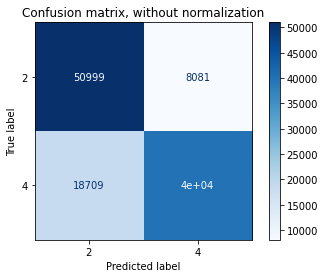

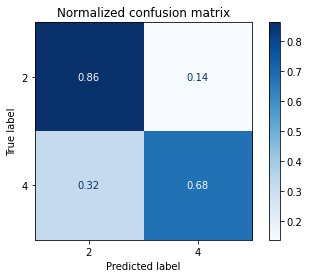

In [ ]:
#confusion matrices
np.set_printoptions(precision=2)
class_names = ['2','4']
classifier = linear_model.LogisticRegression(C=10**8).fit(x_train,y_train)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()